In [14]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2
import psutil

npool = psutil.cpu_count() - 1

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [15]:
posterior_dict = pickle.load(open("events.pkl", "rb"))
    
print(f"Using {len(posterior_dict)} events.")

Using 69 events.


In [16]:
population_model = "PBH-CC-2nd"
cosmology_model = 'flatLCDM'
outdir = f'results/H0_GWTC-3_{population_model}_{cosmology_model}_final/'
injections.update_cut(snr_cut=9, ifar_cut=0)

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [17]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict

{'α': Uniform(minimum=0.0, maximum=5.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None),
 'Mf': Uniform(minimum=1.0, maximum=50.0, name='$M_f$', latex_label='$M_f$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

10:20 bilby INFO    : Running for label 'dynesty', output will be saved to 'results/H0_GWTC-3_PBH-CC-2nd_flatLCDM_final/'
10:20 bilby INFO    : Search parameters:
10:20 bilby INFO    :   α = Uniform(minimum=0.0, maximum=5.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None)
10:20 bilby INFO    :   Mf = Uniform(minimum=1.0, maximum=50.0, name='$M_f$', latex_label='$M_f$', unit=None, boundary=None)
10:20 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
10:20 bilby INFO    :   H0 = 67.4
10:20 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:208: RuntimeWarning: divide by zero encountered in log
10:24 bilby INFO    : Single likelihood evaluation took 2.108e+00 s


0it [00:00, ?it/s]

10:24 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 31, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f8c35d65490>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
10:24 bilby INFO    : Checkpoint every check_point_delta_t = 120s
10:24 bilby INFO    : Using dynesty version 1.0.1
10:24 bilby INFO    : Using the bilby-implemented rwalk samp

6191it [00:02, 3021.03it/s, bound:555 nc:  1 ncall:1.9e+05 eff:3.2% logz=-1760.97+/-0.18 dlogz:0.100>0.1]

10:24 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-2nd_flatLCDM_final//dynesty_resume.pickle
10:24 bilby INFO    : Writing 1645 current samples to results/H0_GWTC-3_PBH-CC-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
10:24 bilby INFO    : Starting to close worker pool.
10:24 bilby INFO    : Finished closing worker pool.


6191it [00:04, 1266.71it/s, bound:555 nc:  1 ncall:1.9e+05 eff:3.4% logz=-1760.89+/-0.19 dlogz:0.000>0.1]

10:24 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


10:24 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:24 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:24 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:24 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:24 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:24 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:24 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:24 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:24 bilby INFO    : Sampling time: 6:14:00.471474
10:24 bilby 

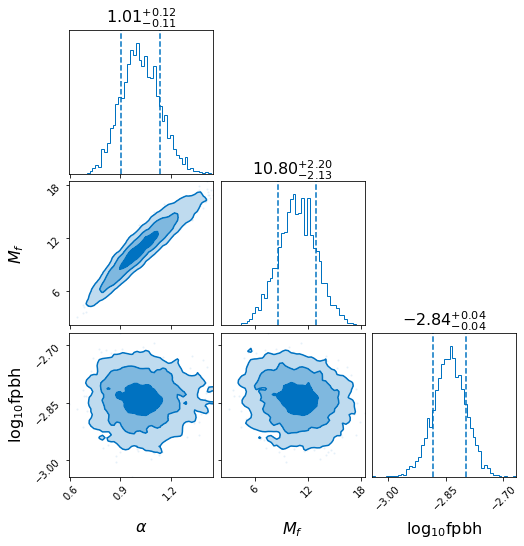

In [18]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(
    population_model,
    cosmology_model,
    prior_dict,
    nlive=500,
    nact=2,
    walks=20,
    outdir=outdir,
    label="dynesty",
    npool=npool,
    parallel=2000,
    check_point_delta_t=120,
)
result.plot_corner()


In [19]:
import numpy as np
np.exp(-1055.437-(-1055.587))

1.1618342427283888

In [20]:
ln_BF = np.array([-1762.438, -1776.472, -1774.288, -1761.052]) - (-1776.472)
BF = np.exp(ln_BF)
BF

array([1.24419588e+06, 1.00000000e+00, 8.88176235e+00, 4.97531877e+06])

In [21]:
ln_BF

array([14.034,  0.   ,  2.184, 15.42 ])

In [22]:
10**(-2.8)

0.001584893192461114

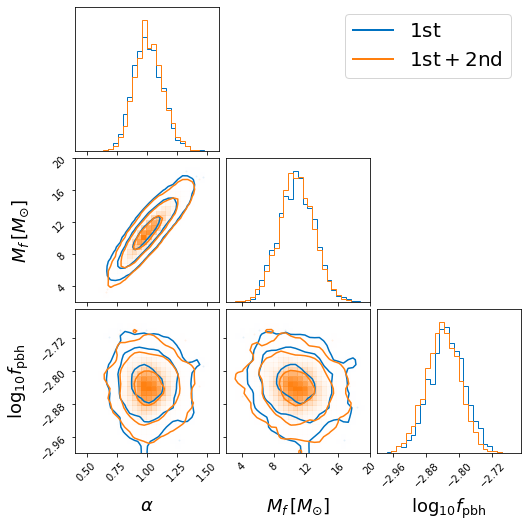

In [23]:
import matplotlib.lines as mlines

outdir1 = "H0_GWTC-3_PBH-CC-1st_flatLCDM_final/"
outdir2 = "H0_GWTC-3_PBH-CC-2nd_flatLCDM_final/"

posteriors1 = np.loadtxt(f"results/{outdir1}/dynesty_samples.dat", skiprows=1)
posteriors2 = np.loadtxt(f"results/{outdir2}/dynesty_samples.dat", skiprows=1)

fig = corner.corner(
    posteriors1,
    bins=30,
    smooth=0.9,
    color="#0072C1",
    labels=[r"$\alpha$", r"$M_f\, [M_{\odot}]$", r"$\log_{10}f_\mathrm{pbh}$"],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=((0.4, 1.6), (2, 20), (-3, -2.65)),
)

corner.corner(
    posteriors2,
    bins=30,
    smooth=0.9,
    color="#FF7F0E",
    labels=[r"$\alpha$", r"$M_f\, [M_{\odot}]$", r"$\log_{10}f_\mathrm{pbh}$"],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=((0.4, 1.6), (2, 20), (-3, -2.65)),
    fig=fig,
    weights=np.ones(len(posteriors2)) * len(posteriors1) / len(posteriors2),
)

blue_line = mlines.Line2D([], [], color="#0072C1", lw=2, label=r"$\rm{1st}$")
orange_line = mlines.Line2D([], [], color="#FF7F0E", lw=2, label=r"$\rm{1st+2nd}$")
plt.legend(
    handles=[blue_line, orange_line],
    bbox_to_anchor=(1, 3.12),
    loc="upper right",
    fontsize=20,
)  # prop={'size': 8})
# plt.savefig("../latex/post-CC.pdf")
plt.show()


In [25]:
def get_credibles(posts):
    x_low, x_median, x_up = np.quantile(posts, [0.05, 0.5, 0.95])
    return x_median, (x_up - x_median), (x_median - x_low)

In [26]:
posts = posteriors2[:, 0]
get_credibles(posts)

(1.0112434869180709, 0.20652344732168948, 0.17598925108014463)

In [27]:
posts = posteriors2[:, 1]
get_credibles(posts)

(10.758984869076935, 3.6307183949039956, 3.5600514630413267)

In [28]:
posts = posteriors2[:, 2]
get_credibles(posts)

(-2.8409171347807756, 0.0678151362445707, 0.07029148981383404)